In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_customers = pd.read_csv("Churn_Modelling.csv")

In [3]:
bank_customers.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Exploratory Data Analysis (EDA)

In [4]:
bank_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Drop RowNumber and CustomerId because it won't be useful in predictive task
bank_customers.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

**Categorical Features**

In [6]:
# Convert object dtype into category
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']
for colname in cat_features:
    bank_customers[colname] = bank_customers[colname].astype('category')

In [7]:
bank_customers[cat_features].nunique()

Geography          3
Gender             2
HasCrCard          2
IsActiveMember     2
NumOfProducts      4
Tenure            11
dtype: int64

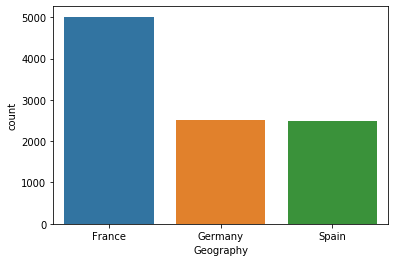

In [8]:
sns.countplot(x='Geography', data=bank_customers)

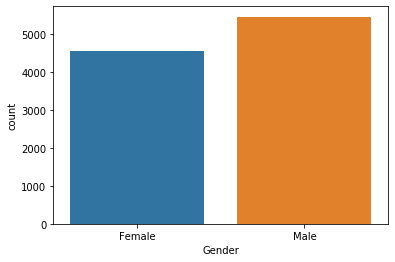

In [9]:
sns.countplot(x='Gender', data=bank_customers)

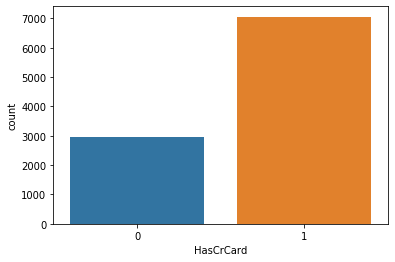

In [10]:
sns.countplot(x='HasCrCard', data=bank_customers)

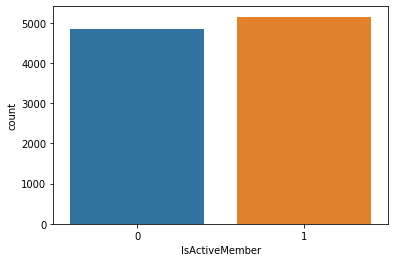

In [11]:
sns.countplot(x='IsActiveMember', data=bank_customers)

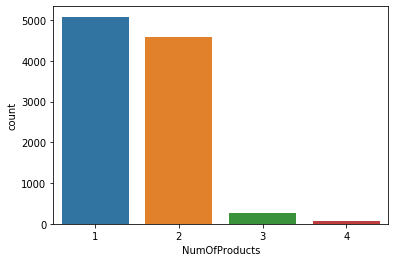

In [12]:
sns.countplot(x='NumOfProducts', data=bank_customers)

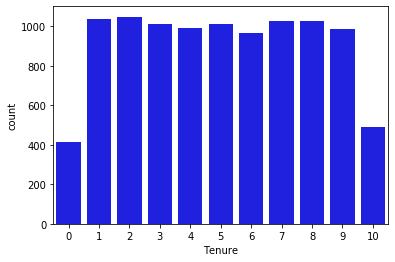

In [13]:
sns.countplot(x='Tenure', data=bank_customers, color='blue')

In [14]:
bank_customers.groupby('Geography').mean()

,CreditScore,Age,Balance,EstimatedSalary,Exited
Geography,,,,,
France,649.668329,38.511767,62092.636516,99899.180814,0.161548
Germany,651.453567,39.771622,119730.116134,101113.435102,0.324432
Spain,651.333872,38.890997,61818.147763,99440.572281,0.166734


In [15]:
bank_customers.groupby('Gender').mean()

,CreditScore,Age,Balance,EstimatedSalary,Exited
Gender,,,,,
Female,650.831389,39.238389,75659.369139,100601.541382,0.250715
Male,650.276892,38.658237,77173.974506,99664.576931,0.164559


In [16]:
bank_customers.groupby('HasCrCard').mean()

,CreditScore,Age,Balance,EstimatedSalary,Exited
HasCrCard,,,,,
0,651.345331,39.112054,77920.787552,100974.397711,0.208149
1,650.187952,38.842381,75886.913330,99721.161949,0.201843


In [17]:
bank_customers.groupby('IsActiveMember').mean()

,CreditScore,Age,Balance,EstimatedSalary,Exited
IsActiveMember,,,,,
0,647.973603,37.997938,77134.376863,100767.203854,0.268509
1,652.934188,39.791497,75875.422145,99452.965894,0.142691


In [18]:
bank_customers.groupby("NumOfProducts").mean()

,CreditScore,Age,Balance,EstimatedSalary,Exited
NumOfProducts,,,,,
1,649.120968,39.673092,98551.870614,99487.256851,0.277144
2,652.188671,37.753595,51879.145813,100452.012821,0.075817
3,648.105263,43.195489,75458.328195,104318.130564,0.827068
4,653.583333,45.683333,93733.135000,104763.723333,1.000000


In [19]:
bank_customers.groupby('Tenure').mean()

,CreditScore,Age,Balance,EstimatedSalary,Exited
Tenure,,,,,
0,652.043584,39.186441,79878.910630,102374.579128,0.230024
1,648.806763,39.428986,78555.384222,100468.618957,0.224155
2,652.832061,39.058206,76839.626469,98312.359857,0.191794
3,650.530228,39.028741,77668.059881,97667.196283,0.211100
4,651.502528,38.239636,74059.394065,99867.777826,0.205258
5,650.527668,39.287549,76444.280860,101286.009644,0.206522
6,647.380558,38.862461,74403.942637,99168.733154,0.202689
7,649.606031,38.367704,75551.634426,101257.240370,0.172179
8,647.749268,38.450732,77936.598254,101072.102937,0.192195


In [20]:
bank_customers.groupby("Exited").mean()

,CreditScore,Age,Balance,EstimatedSalary
Exited,,,,
0,651.853196,37.408389,72745.296779,99738.391772
1,645.351497,44.837997,91108.539337,101465.677531


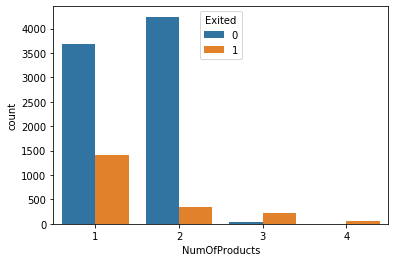

In [21]:
sns.countplot(x='NumOfProducts', hue='Exited', data=bank_customers)

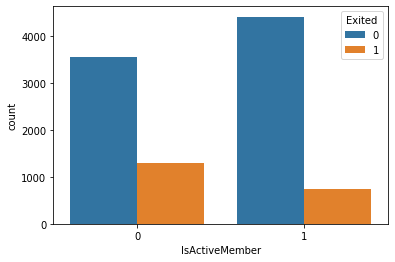

In [22]:
sns.countplot(x=bank_customers['IsActiveMember'], hue=bank_customers['Exited'])

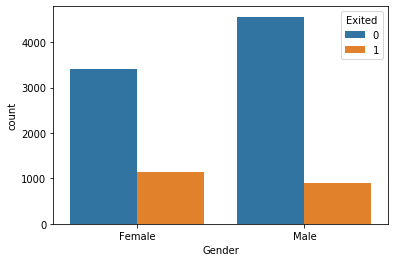

In [23]:
sns.countplot(x=bank_customers["Gender"], hue=bank_customers['Exited'])

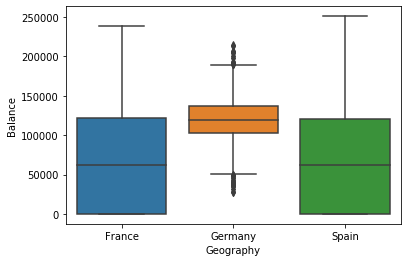

In [24]:
sns.boxplot(x=bank_customers['Geography'], y=bank_customers['Balance'])

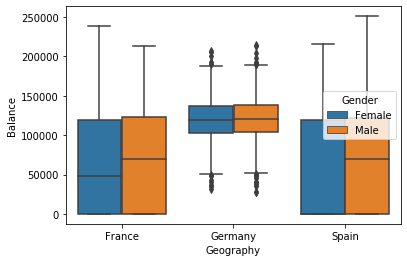

In [25]:
sns.boxplot(x=bank_customers['Geography'], y=bank_customers['Balance'], hue=bank_customers['Gender'])

Interesting Findings:

    1) 

**Numerical Features**

In [26]:
bank_customers.columns
num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [27]:
bank_customers[num_features].nunique()

CreditScore         460
Age                  70
Balance            6382
EstimatedSalary    9999
dtype: int64

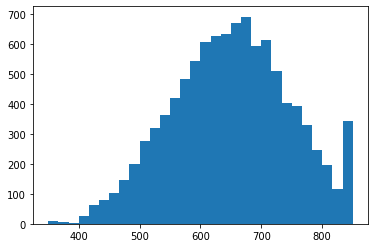

In [28]:
bank_customers['CreditScore'].hist(bins=30, grid=False)

In [29]:
bank_customers[bank_customers['CreditScore'] == bank_customers['CreditScore'].max()]['Exited'].value_counts()

0    190
1     43
Name: Exited, dtype: int64

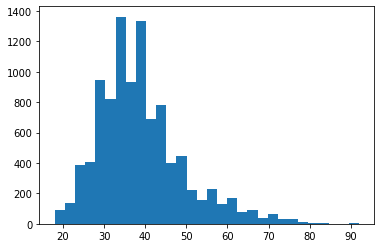

In [30]:
bank_customers['Age'].hist(bins=30, grid=False)

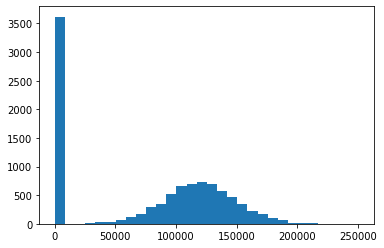

In [31]:
bank_customers['Balance'].hist(bins=30, grid=False)

In [32]:
bank_customers[bank_customers['Balance'] == 0]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

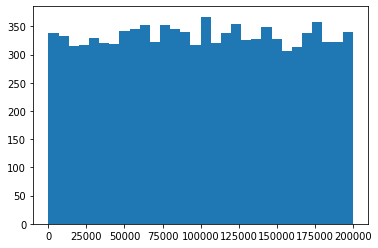

In [33]:
bank_customers['EstimatedSalary'].hist(bins=30, grid=False)

/Users/ryan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ryan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


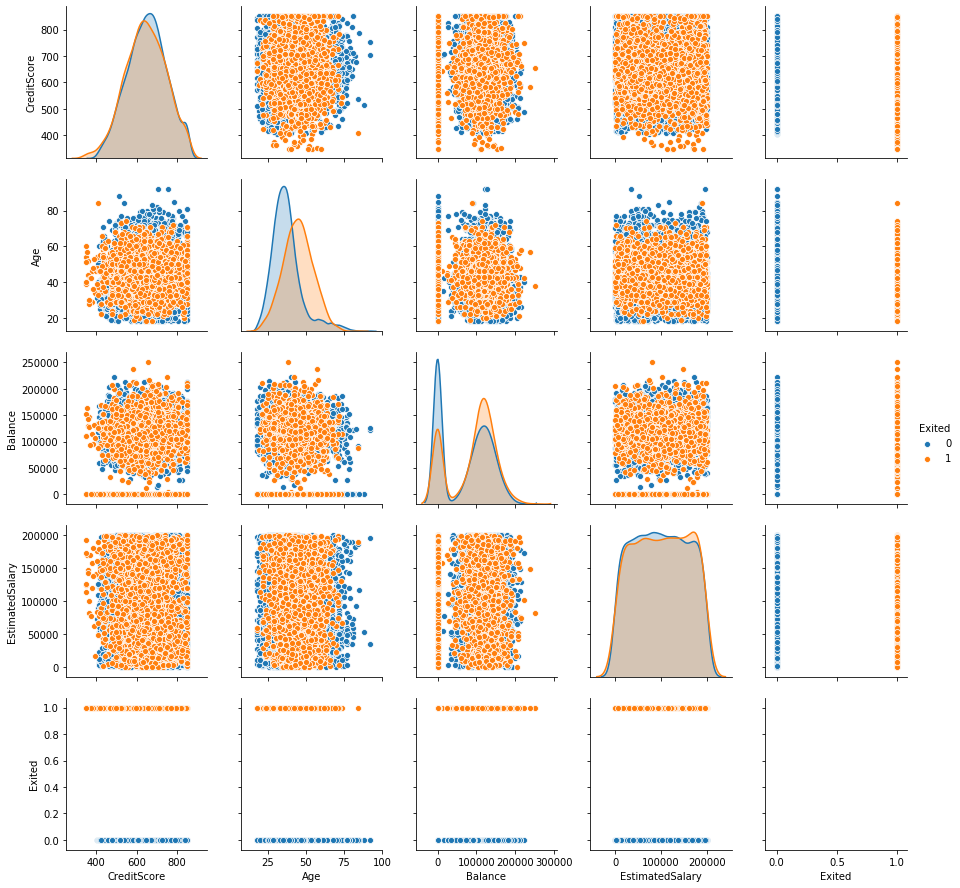

In [34]:
#num_df = bank_customers[num_features + ['Exited']] 
sns.pairplot(bank_customers[num_features + ['Exited']] , hue='Exited')

Interesting finding: 

~ Features ~

- Out of all the customers who have the highest credit score, about 81% of them didn't exit.
- A third of the customers didn't deposit any money. Out of all these customers, about 86% of them exit.

~ Model ~

- Since most of the data overlaps, it's better we choose a non-linear classifier (decision tree, random forest, kNN etc.)

## Splitting into train/test/validation

In [35]:
from sklearn.model_selection import train_test_split
X = bank_customers.drop(['Exited'], axis = 1)
y = bank_customers['Exited']
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state=42)

## Feature Engineering

In [36]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
target_names = ['Did not Exit', "Exited"]
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
pred = dummy_clf.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      4769
           1       0.00      0.00      0.00      1231

    accuracy                           0.79      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.79      0.70      6000



/Users/ryan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
standardized_df = pd.DataFrame(ss.fit_transform(bank_customers[num_features]), columns = num_features)
standardized_df['Exited'] = bank_customers['Exited']

In [38]:
from sklearn.preprocessing import LabelEncoder
le_geography = LabelEncoder()
le_gender = LabelEncoder()
le_HasCrCard = LabelEncoder()
le_IsActiveMember = LabelEncoder()
le_NumOfProducts = LabelEncoder()
le_Tenure = LabelEncoder()

le_df = pd.DataFrame()

le_df['Geography'] = le_geography.fit_transform(bank_customers['Geography'])
le_df['Gender'] = le_gender.fit_transform(bank_customers['Gender'])
le_df['HasCrCard'] = le_HasCrCard.fit_transform(bank_customers['HasCrCard'])
le_df['IsActiveMember'] = le_IsActiveMember.fit_transform(bank_customers['IsActiveMember'])
le_df['NumOfProducts'] = le_NumOfProducts.fit_transform(bank_customers['NumOfProducts'])
le_df['Tenure'] = le_Tenure.fit_transform(bank_customers['Tenure'])

le_df.head()

,Geography,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,0,0,1,1,0,2
1,2,0,0,1,0,1
2,0,0,1,0,2,8
3,0,0,0,0,1,1
4,2,0,1,1,0,2


In [39]:
model_df = pd.concat([standardized_df,le_df],axis=1)
model_df.head()

,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,-0.326221,0.293517,-1.225848,0.021886,1,0,0,1,1,0,2
1,-0.440036,0.198164,0.117350,0.216534,0,2,0,0,1,0,1
2,-1.536794,0.293517,1.333053,0.240687,1,0,0,1,0,2,8
3,0.501521,0.007457,-1.225848,-0.108918,0,0,0,0,0,1,1
4,2.063884,0.388871,0.785728,-0.365276,0,2,0,1,1,0,2


## Now that we have our Data in the desired form, we will be testing alot of different models:

In [40]:
X = model_df.drop(['Exited'],axis=1)
y = model_df['Exited']
X_train, x_test, y_train, y_test = train_test_split(X,y)

### First, Let's do a DecisionTree:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2014
           1       0.64      0.38      0.47       486

    accuracy                           0.84      2500
   macro avg       0.75      0.66      0.69      2500
weighted avg       0.82      0.84      0.82      2500



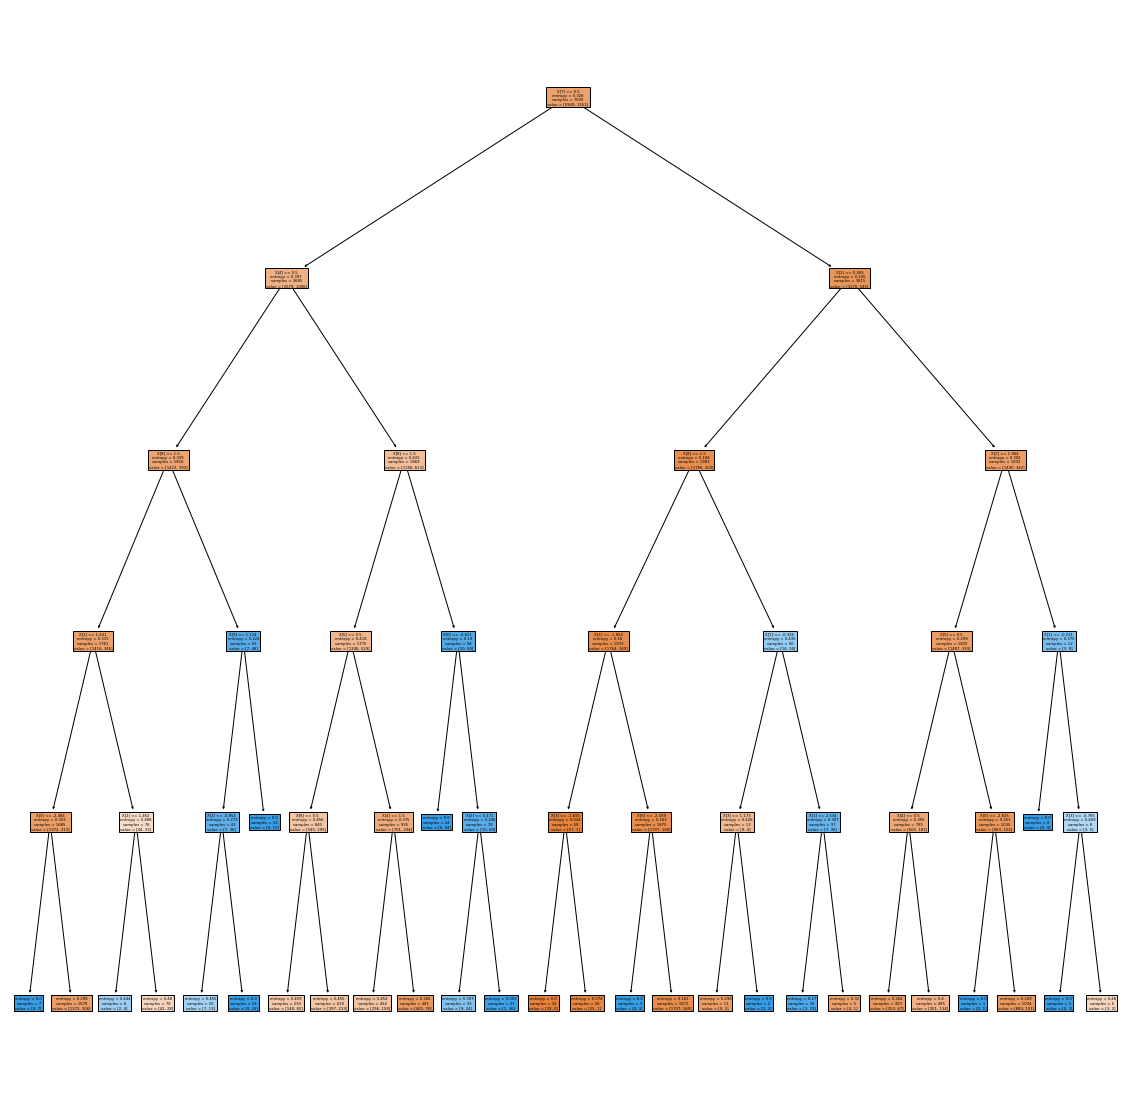

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error

dt_clf = DecisionTreeClassifier(max_depth=5,max_features='sqrt')

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(x_test)
print(classification_report(y_test, pred))
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dt_clf.fit(X_train, y_train), ax=ax, filled=True)
plt.show()

### Now let's try a KNN Classifier:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2014
           1       0.59      0.38      0.46       486

    accuracy                           0.83      2500
   macro avg       0.72      0.66      0.68      2500
weighted avg       0.81      0.83      0.81      2500



### Taking this further we develop a RandomForestClassifier:

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1800, min_samples_split=2, 
                             min_samples_leaf=1, max_features='auto', 
                             max_depth=10, bootstrap=True)
rf.fit(X_train,y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2014
           1       0.79      0.41      0.54       486

    accuracy                           0.86      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.86      0.86      0.85      2500



### Continuing with our Models, we are going to see how AdaBoost performs on our Data:

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=1800)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2014
           1       0.68      0.44      0.54       486

    accuracy                           0.85      2500
   macro avg       0.78      0.70      0.72      2500
weighted avg       0.84      0.85      0.84      2500



### We also want to see how a GaussionProcessClassifier performs:

In [45]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
 
gpc = GaussianProcessClassifier().fit(X_train, y_train)

In [46]:
gpc.score(X_train, y_train)

0.8906666666666667

### Here we are seeing how a GaussianNB model performs on our Data:

In [47]:
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)
pred = GNB_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2014
           1       0.71      0.26      0.38       486

    accuracy                           0.84      2500
   macro avg       0.78      0.62      0.64      2500
weighted avg       0.82      0.84      0.80      2500



### Along with these we are going to test a SVC model:

In [48]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
pred = svc_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2014
           1       0.82      0.35      0.49       486

    accuracy                           0.86      2500
   macro avg       0.84      0.67      0.71      2500
weighted avg       0.86      0.86      0.84      2500



### Finally we are going to try a Neural Network model, MLPClassifier:

In [49]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(max_iter=3000).fit(X_train, y_train)
pred = MLP_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2014
           1       0.73      0.49      0.58       486

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



## Now that we have tried 8 different Models we evaluate the outputs.

## Ultimately we are going to be moving forward with RandomForest:

# Final Model:

## Hyperparameter tuning our Final Model and finalizing the tests

In [52]:
rf = RandomForestClassifier(n_estimators=1800, min_samples_split=2, 
                             min_samples_leaf=1, max_features='auto', 
                             max_depth=10, bootstrap=True)
rf.fit(X_train,y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2014
           1       0.79      0.42      0.54       486

    accuracy                           0.86      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.86      0.86      0.85      2500



In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


clf = RandomizedSearchCV(rf, random_grid)
search = clf.fit(X_train,y_train)
search.best_params_

/Users/ryan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [68]:
X_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [69]:
rf = RandomForestClassifier(n_estimators=2000, min_samples_split=2, 
                             min_samples_leaf=4, max_features='auto', 
                             max_depth=50, bootstrap=True)
rf.fit(X_train,y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1558
           1       0.80      0.45      0.57       442

    accuracy                           0.85      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.85      0.84      2000



In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1510,   48],
       [ 245,  197]])